In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split  
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [10]:
data = pd.read_csv("concrete_data.csv")

## Data Analysis

In [11]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [12]:
data.shape

(1030, 9)

** has 1030 rows and 9 columns

In [13]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


- cement – Amount of cement in kg/m³
- blast_furnace_slag – Amount of slag in kg/m³
- fly_ash – Amount of fly ash in kg/m³
- water – Amount of water in kg/m³
- superplasticizer – Chemical additive in kg/m³
- coarse_aggregate – Amount of coarse aggregate in kg/m³
- fine_aggregate – Amount of fine aggregate in kg/m³
- age – Age of concrete in days
- concrete_compressive_strength – Measured compressive strength in MPa; target variable.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


All columns are numeric in representation

In [15]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


- cement – Range: (102.0 – 540.0), Average: 281.17
- blast_furnace_slag – Range: (0.0 – 359.4), Average: 73.90
- fly_ash – Range: (0.0 – 200.1), Average: 54.19
- water – Range: (121.8 – 247.0), Average: 181.57
- superplasticizer – Range: (0.0 – 32.2), Average: 6.20
- coarse_aggregate – Range: (801.0 – 1145.0), Average: 972.92
- fine_aggregate – Range: (594.0 – 992.6), Average: 773.58
- age – Range: (1 – 365), Average: 45.66
- concrete_compressive_strength – Range: (2.33 – 82.6), Average: 35.82

## Data Visualization

### 1. Histogram for each essential numeric

In [31]:
numerical_cols = ['cement','water','age','concrete_compressive_strength']

for col in numerical_cols:
    fig = px.histogram(data, x=col, nbins=20, marginal="box",
                       title=f"Histogram of {col} with Boxplot",
                       width=600, height=350)
    fig.show()


### 2. scatter plot - cement vs strength

In [47]:
fig = px.scatter(data, x='cement', y='concrete_compressive_strength',
                 color='age', 
                 title='Cement vs Strength (Age as color, Water as size)',
                 width=700, height=450)
fig.show()

### 3. boxplot - strenth vs age

In [20]:
fig = px.box(data, x='age', y='concrete_compressive_strength',
             title="Compressive Strength Distribution by Age",
             width=700, height=450)
fig.show()


### 4. Correlation- heatmap

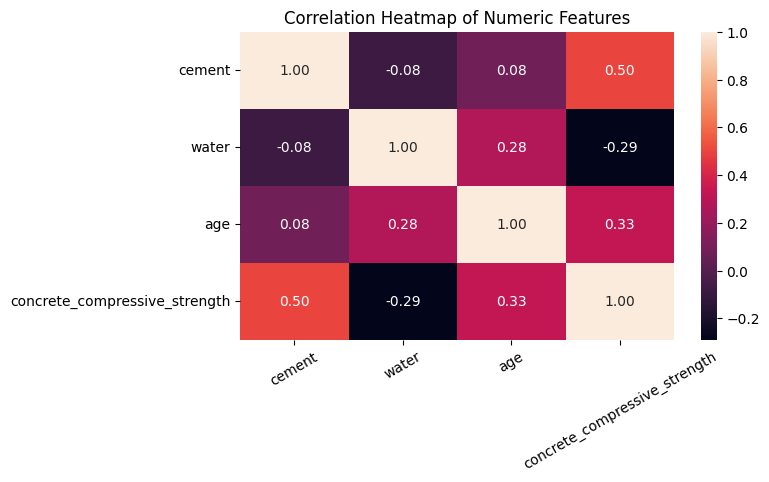

In [44]:
corr = data[numerical_cols].corr()

plt.figure(figsize=(7, 4))
sns.heatmap(
    corr,                # correlation matrix
    annot=True,          # show numbers in cells
    fmt=".2f",           # float format with 2 decimals
)
plt.xticks(rotation=30)   

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Data Preprocessing

In [51]:
data.duplicated().sum()

np.int64(0)

In [50]:
data = data.drop_duplicates()

In [52]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

** nulls and duplicates are removed

## Random Forest Regression

In [53]:
x = data.drop('concrete_compressive_strength', axis=1)
y = data['concrete_compressive_strength']

In [54]:
print(x.shape) 
print(y.shape)

(1005, 8)
(1005,)


In [55]:
x.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [56]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: concrete_compressive_strength, dtype: float64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [58]:
print(x_train.shape)     # 80%  
print(x_test.shape)  
print(y_train.shape)     # 80%  
print(y_test.shape) 

(804, 8)
(201, 8)
(804,)
(201,)


** data is ready for Random forest regrssion

In [61]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=7,
    random_state=42
)

model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",7
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [62]:
import joblib
joblib.dump(model, 'concrete_strength_pred.pkl')

['concrete_strength_pred.pkl']

In [63]:
y_pred = model.predict(x_test) 

In [64]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 0.8809628234109843
Mean Squared Error: 35.5117525679569


In [65]:
compare_df = pd.DataFrame({
    'Actual strength': y_test,
    'Predicted strength': y_pred
})

compare_df.head()

,Actual strength,Predicted strength
951,19.01,25.374332
654,24.29,27.132150
706,26.32,25.229640
538,34.57,34.554296
389,44.13,48.558237


In [68]:
fig = px.scatter(compare_df, x='Actual strength', y='Predicted strength',
                 title="Actual vs Predicted Cement Strength",
                 width=600, height=450)
fig.show()
